In [1]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup as soup
from matplotlib.image import imread
import matplotlib.pyplot as plt
import urllib.request
import os
import seaborn as sns

In [ ]:
# Scrape images from url into correct file structure to be fed into a CNN

import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup as soup
from matplotlib.image import imread
import matplotlib.pyplot as plt
import urllib.request
import os
import seaborn as sns

df = pd.read_csv("../Resources/all_data.csv")

def scrape_image_data(dataframe, list_of_tag_names, batch_per_tag, train_size, file_path):

    train_test_split_counter = np.ceil(batch_per_tag*train_size)
    
    for tag in list_of_tag_names:
        copy_df = df.copy()
        copy_df[tag] = df["tags"].str.contains(tag)
        df_title = f"{tag}_df"
        df_title = copy_df[copy_df[tag]==True]
        # return the number of batches specified. If there are fewer rows in the data frame than
        # batch size, inform the user.
        if len(df_title)>batch_per_tag:
            df_title = df_title.iloc[:batch_per_tag]
        else:
            print(f"There are only " +len(df_title) + " rows that match this tag")
            user_input = input("Type 'Yes' if you would like to use all rows, or 'no' if you would like to cancel the function?")
            if user_input =="Yes":
                pass
            else:
                break
        no_label = df.copy()
        no_label = copy_df[~copy_df[tag]==True]
        if len(no_label)>batch_per_tag:
            no_lable=no_label.iloc[:batch_per_tag]
        else:
            print(f"There are only " +len(no_label) + " rows that don't match this tag")
            print(f"Try a different train size.")
            break
        labels = [df_title, no_label]
        counter=0
        labels_counter=0
        for image_type in labels:
            if labels_counter==1:
                counter=0
                class_label="no"
                label_edit="not_"
            else:
                class_label="yes"
                label_edit=""
                labels_counter+=1
            list_of_urls = image_type["sample_url"].values.tolist()
            for i, url_title in enumerate(list_of_urls):
                if counter<train_test_split_counter:
                    try:
                        if os.path.isdir(f"{file_path}{tag}/train/{class_label}"):
                            urllib.request.urlretrieve(f"https:{url_title}",f"{file_path}{tag}/train/{class_label}/{label_edit}{tag}{i+1}.png")
                            counter+=1
                        else:
                            os.mkdir(f"{file_path}{tag}")
                            os.mkdir(f"{file_path}{tag}/train")
                            os.mkdir(f"{file_path}{tag}/train/yes")
                            os.mkdir(f"{file_path}{tag}/train/no")
                            urllib.request.urlretrieve(f"https:{url_title}",f"{file_path}{tag}/train/{class_label}/{label_edit}{tag}{i+1}.png")
                            counter+=1
                    except:
                        counter+=1
                        continue
                else:
                    try:
                        if os.path.isdir(f"{file_path}{tag}/test/{class_label}"):
                            urllib.request.urlretrieve(f"https:{url_title}",f"{file_path}{tag}/test/{class_label}/{label_edit}{tag}{i+1}.png")
                            counter+=1
                        else:
                            os.mkdir(f"{file_path}{tag}/test")
                            os.mkdir(f"{file_path}{tag}/test/yes")
                            os.mkdir(f"{file_path}{tag}/test/no")
                            urllib.request.urlretrieve(f"https:{url_title}",f"{file_path}{tag}/test/{class_label}/{label_edit}{tag}{i+1}.png")
                            counter+=1
                    except:
                        counter +=1
                        continue

        
mylist = ["souryuu_asuka_langley","red_hair"]
file_path = "../Resources/anime_categories/"
scrape_image_data(df,mylist,500,.75, file_path)
    

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


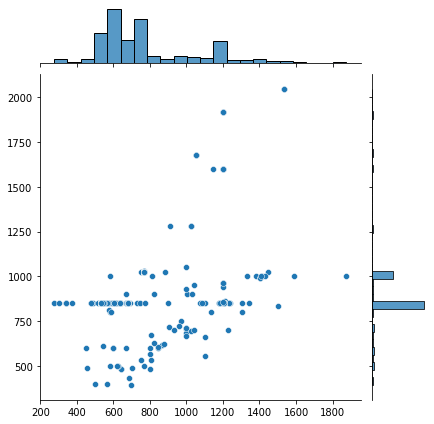

In [2]:
dim1=[]
dim2=[]

train_path = "/Users/josephthompson/Documents/Projects_MI/Anime_CNN/Resources/anime_categories/souryuu_asuka_langley/train/yes/"

for image_filename in os.listdir(train_path):
    
    img = imread(train_path + image_filename, format="jpeg")
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)
    

sns.jointplot(dim1,dim2)

In [3]:
print(np.mean(dim1))
print(np.mean(dim2))

782.0639534883721
901.3662790697674


In [4]:
image_shape=(780,900,3)

In [5]:
asuka_img = imread("/Users/josephthompson/Documents/Projects_MI/Anime_CNN/Resources/anime_categories/souryuu_asuka_langley/train/yes/" + 'souryuu_asuka_langley352.png', format="jpeg").min()

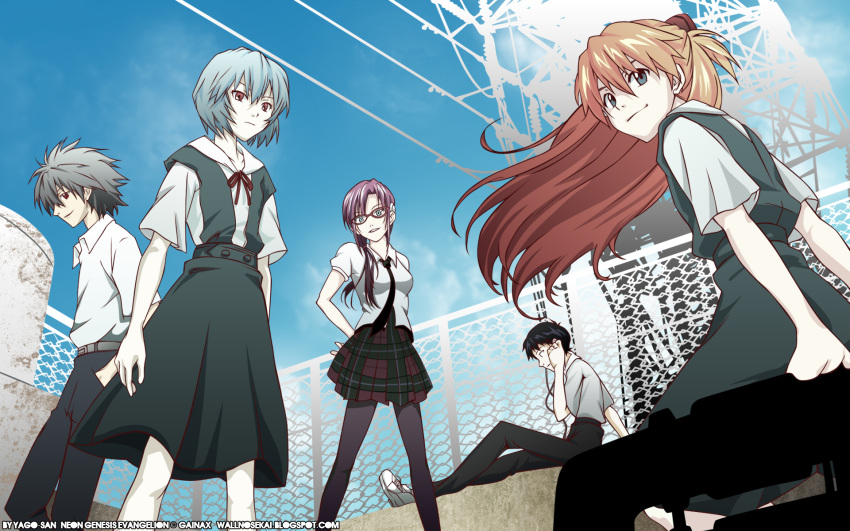

In [36]:
from PIL import Image

Image.open("/Users/josephthompson/Documents/Projects_MI/Anime_CNN/Resources/anime_categories/souryuu_asuka_langley/train/yes/" + 'souryuu_asuka_langley28.png')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range = 20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=.1,
                              horizontal_flip=True,
                              fill_mode="nearest")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [ ]:
# Implementing the AlexNet infrastructure

model= Sequential()

model.add(Conv2D(filters=96, kernel_size=(12,12), strides=(4,4), input_shape=image_shape, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
          
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"))
model.add(BatchNormalization())
          
model.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation="relu", padding="same"))
model.add(BatchNormalization())
          
model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation="relu", padding="same"))
model.add(BatchNormalization())
          
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
    
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
          
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
          
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss",mode="min",patience=2)

In [ ]:
train_path = "/users/josephthompson/Documents/Projects_MI/Anime_CNN/Resources/anime_categories/souryuu_asuka_langley/train/"
test_path = "/users/josephthompson/Documents/Projects_MI/Anime_CNN/Resources/anime_categories/souryuu_asuka_langley/test/"
batch_size=16

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode="binary")

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode="binary",
                                              shuffle=False)



In [ ]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

In [ ]:
pred = model.predict_generator(test_image_gen)

In [ ]:
predictions = pred>0.5

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_image_gen.classes

In [ ]:
print(train_image_gen.class_indices)
print("\n")
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
print(confusion_matrix(test_image_gen.classes, predictions))

In [ ]:
from keras.applications.vgg19 import VGG19
vgg_conv= VGG19(include_top=False, classes=1000,weights="imagenet",input_shape=image_shape)

for layer in vgg_conv.layers:
    layer.trainable=False

In [ ]:
for layer in vgg_conv.layers:
    print(layer)

In [ ]:
model=Sequential()

model.add(vgg_conv)

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
          
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
          
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

In [ ]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

In [ ]:
pred = model.predict_generator(test_image_gen)

predictions = pred>0.5

predictions

from sklearn.metrics import classification_report, confusion_matrix

test_image_gen.classes

print(train_image_gen.class_indices)
print("\n")
print(classification_report(test_image_gen.classes,predictions))

print(confusion_matrix(test_image_gen.classes, predictions))